In [1]:
import numpy as np
import pandas as pd
import re

In [2]:
pd.set_option('display.max_colwidth', None)
pd.set_option('display.max_rows', None)
pd.set_option('display.max_columns', None)

In [3]:
df = pd.read_csv('gurgaon_property_cleaned.csv')

In [4]:
df.head(1)

property_type                 society    sector  price_in_crores  \
0          flat  maa bhagwati residency  sector 7             0.45   

   price_per_sqft  area_sqft                    areaWithType  bedRoom  \
0          5000.0      900.0  Carpet area: 900 (83.61 sq.m.)      2.0   

   bathroom balcony additionalRoom  floorNum facing    agePossession  \
0       2.0       1  not available       4.0   West  1 to 5 Year Old   

                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                nearbyLocations  \
0  ['Chintapurni Mandir', 'State bank ATM', 'Pearl Dental Clinic', 'Taneja Hospital', 'Dr. Ashok Jain', 'Dr. Madan Clinic', 'Geeta Nursing Home Gurgaon', 'Chiranjiv Hospital', 'Dev Man Kathuria Clinic', 'Aryan Hospital', 'Kr Dental Hub', 'Swastik Maternity and Medical Centre', 'Satyam Hospital Gurgaon', 'Ravi Clinic and Health Care Centre', 'D.R. Rajnis Gupta Clinic', 'Esic Hospital Gurugram', 'Gurgaon Eye Centre', 'Bindal Clinic', 'Shiv Mahima Patient Care Bureau', 'Shree Krishna Hospital Gurgaon', 'M.S Hospital', 'My Care Clinic', 'Ankur Clinic and Maternity Home', 'Triveni Hospital Gurgaon', 'Shri Gobind Hospital', 'Navjeevan Hospital and Maternity Centre', 'Lal Superspeciality Hospital', 'Sparsh Hospital Gurgaon', 'Prateek Nursing Home And Polyclinic', 'Jain Sant Phool Chand Ji Charitable Hospital', 'Sarvodya Hospital', 'Bhatnagar Maternity and Nursing Home', 'Tirath Ram Hospitals Pvt Ltd', 'Dr. Sarvejeet Singh', 'Centre For Sight Gurgaon New Railway Road', 'Dr. Ajay S. Gupta Clinic', 'Kidney Clinic', 'Mangalam Hospital and Heart Centre Gurgaon', 'Sethi Hospital Gurgaon', 'Shubham Hospital Gurgaon', 'Kharbanda Maternity and Nursing Home', 'Gupta Hospital Gurgaon', 'Dentecare - Multispeciality Dental Clinic', 'State bank of india', 'Hdfc bank', 'Kotak bank', 'Indian bank', 'Pizza Hut', 'St. Michaels Sr. Sec. School', 'Dronacharya Government College']   

                                                                                                                                                                                                                                                       furnishDetails  \
0  ['3 Fan', '4 Light', '1 Wardrobe', 'No AC', 'No Bed', 'No Chimney', 'No Curtains', 'No Dining Table', 'No Exhaust Fan', 'No Geyser', 'No Modular Kitchen', 'No Microwave', 'No Fridge', 'No Sofa', 'No Stove', 'No TV', 'No Washing Machine', 'No Water Purifier']   

                                                                                                   features  
0  ['Feng Shui / Vaastu Compliant', 'Security / Fire Alarm', 'Lift(s)', 'Water Storage', 'Visitor Parking']

## areaWithType

In [5]:
df[['area_sqft','areaWithType']]

area_sqft  \
0        900.000000   
1        650.000000   
2        595.000000   
3       1200.000000   
4       1345.000000   
5        654.000000   
6       1500.000000   
7       2290.000000   
8       1350.000000   
9       2813.000000   
10       983.000000   
11       519.000000   
12      1945.000000   
13      1385.000000   
14      1300.000000   
15      2343.000000   
16       639.000000   
17       915.000000   
18              NaN   
19      2100.000000   
20      1103.000000   
21      2150.000000   
22      1103.000000   
23      2025.000000   
24      2217.000000   
25       531.000000   
26      3355.000000   
27      2572.000000   
28       750.000000   
29      1056.000000   
30       594.000000   
31      3200.000000   
32       626.000000   
33      1300.000000   
34      1300.000000   
35      1180.000000   
36      2030.000000   
37       555.000000   
38      1365.000000   
39      1320.000000   
40      1194.000000   
41      2000.000000   
42      2038.000000   
43       700.000000   
44      1211.000000   
45      2727.000000   
46      1385.000000   
47      1829.000000   
48      2100.000000   
49      1650.000000   
50      1100.000000   
51      1530.000000   
52      1120.000000   
53      1250.000000   
54      2651.000000   
55       450.000000   
56      1570.000000   
57      1198.000000   
58      1443.000000   
59      1897.000000   
60      1260.000000   
61      1725.000000   
62      2144.000000   
63      2315.000000   
64      2250.000000   
65      1057.000000   
66       560.000000   
67       990.000000   
68      1370.000000   
69       532.000000   
70       580.000000   
71      1452.000000   
72      1423.000000   
73       640.000000   
74       822.000000   
75      2159.000000   
76      1950.000000   
77      1300.000000   
78      1423.000000   
79     58228.000000   
80      4246.000000   
81       743.000000   
82      2250.000000   
83      2177.000000   
84       650.000000   
85       884.000000   
86      1118.000000   
87      1433.000000   
88      1120.000000   
89      1120.000000   
90      1996.000000   
91      1080.000000   
92      2727.000000   
93      1789.000000   
94      1380.000000   
95      1562.000000   
96      1654.000000   
97      1828.000000   
98      1950.000000   
99      1200.000000   
100      324.000000   
101     2000.000000   
102     1929.000000   
103      958.000000   
104      711.000000   
105      965.000000   
106      524.000000   
107      581.000000   
108     1198.000000   
109     1310.000000   
110   642857.000000   
111      750.000000   
112     1557.000000   
113     1440.000000   
114     2597.000000   
115     1940.000000   
116      567.000000   
117      623.000000   
118      629.000000   
119     1423.000000   
120     1177.000000   
121     1400.000000   
122     2000.000000   
123     1276.000000   
124     1276.000000   
125     1259.000000   
126     1640.000000   
127      610.000000   
128     1690.000000   
129      482.000000   
130      531.000000   
131     1935.000000   
132     1950.000000   
133      591.000000   
134      650.000000   
135     1530.000000   
136     1910.000000   
137     1789.000000   
138     2016.000000   
139     4343.000000   
140     2000.000000   
141      958.000000   
142     1225.000000   
143     1751.000000   
144     1689.000000   
145      850.000000   
146     1838.000000   
147     1440.000000   
148     1500.000000   
149     1350.000000   
150      626.000000   
151     1570.000000   
152      520.000000   
153     1867.000000   
154      926.000000   
155     1630.000000   
156      951.000000   
157      514.000000   
158     1735.000000   
159     2300.000000   
160      380.000000   
161     1105.000000   
162     1744.000000   
163     1252.000000   
164     1000.000000   
165     4500.000000   
166     1850.000000   
167     2600.000000   
168     2871.000000   
169     1180.000000   
170     1865.000000   
171     1537.000000   
172     1756.000000   
173     

In [6]:
# Define regex extractors
def extract_area(pattern, text):
    if not isinstance(text, str):
        return None  # Safely skip NaN or non-string rows
    match = re.search(pattern, text)
    if match:
        return match.group(1).strip()
    return None

# Apply extractors
df['Super Built up area'] = df['areaWithType'].apply(lambda x: extract_area(r'Super Built up area\s*([^\(]+)', x))
df['Built Up area'] = df['areaWithType'].apply(lambda x: extract_area(r'Built Up area:?\s*([^\(]+)', x))
df['Carpet area'] = df['areaWithType'].apply(lambda x: extract_area(r'Carpet area:?\s*([^\(]+)', x))

In [7]:
df.head(1)

property_type                 society    sector  price_in_crores  \
0          flat  maa bhagwati residency  sector 7             0.45   

   price_per_sqft  area_sqft                    areaWithType  bedRoom  \
0          5000.0      900.0  Carpet area: 900 (83.61 sq.m.)      2.0   

   bathroom balcony additionalRoom  floorNum facing    agePossession  \
0       2.0       1  not available       4.0   West  1 to 5 Year Old   

                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                nearbyLocations  \
0  ['Chintapurni Mandir', 'State bank ATM', 'Pearl Dental Clinic', 'Taneja Hospital', 'Dr. Ashok Jain', 'Dr. Madan Clinic', 'Geeta Nursing Home Gurgaon', 'Chiranjiv Hospital', 'Dev Man Kathuria Clinic', 'Aryan Hospital', 'Kr Dental Hub', 'Swastik Maternity and Medical Centre', 'Satyam Hospital Gurgaon', 'Ravi Clinic and Health Care Centre', 'D.R. Rajnis Gupta Clinic', 'Esic Hospital Gurugram', 'Gurgaon Eye Centre', 'Bindal Clinic', 'Shiv Mahima Patient Care Bureau', 'Shree Krishna Hospital Gurgaon', 'M.S Hospital', 'My Care Clinic', 'Ankur Clinic and Maternity Home', 'Triveni Hospital Gurgaon', 'Shri Gobind Hospital', 'Navjeevan Hospital and Maternity Centre', 'Lal Superspeciality Hospital', 'Sparsh Hospital Gurgaon', 'Prateek Nursing Home And Polyclinic', 'Jain Sant Phool Chand Ji Charitable Hospital', 'Sarvodya Hospital', 'Bhatnagar Maternity and Nursing Home', 'Tirath Ram Hospitals Pvt Ltd', 'Dr. Sarvejeet Singh', 'Centre For Sight Gurgaon New Railway Road', 'Dr. Ajay S. Gupta Clinic', 'Kidney Clinic', 'Mangalam Hospital and Heart Centre Gurgaon', 'Sethi Hospital Gurgaon', 'Shubham Hospital Gurgaon', 'Kharbanda Maternity and Nursing Home', 'Gupta Hospital Gurgaon', 'Dentecare - Multispeciality Dental Clinic', 'State bank of india', 'Hdfc bank', 'Kotak bank', 'Indian bank', 'Pizza Hut', 'St. Michaels Sr. Sec. School', 'Dronacharya Government College']   

                                                                                                                                                                                                                                                       furnishDetails  \
0  ['3 Fan', '4 Light', '1 Wardrobe', 'No AC', 'No Bed', 'No Chimney', 'No Curtains', 'No Dining Table', 'No Exhaust Fan', 'No Geyser', 'No Modular Kitchen', 'No Microwave', 'No Fridge', 'No Sofa', 'No Stove', 'No TV', 'No Washing Machine', 'No Water Purifier']   

                                                                                                   features  \
0  ['Feng Shui / Vaastu Compliant', 'Security / Fire Alarm', 'Lift(s)', 'Water Storage', 'Visitor Parking']   

  Super Built up area Built Up area Carpet area  
0     

In [8]:
df[~((df['Super Built up area'].isnull())|(df['Built Up area'].isnull())|(df['Carpet area'].isnull()))][['price_in_crores','property_type','area_sqft','areaWithType','Super Built up area','Built Up area','Carpet area']]

price_in_crores property_type  area_sqft  \
38               0.78          flat     1365.0   
101              2.10          flat     2000.0   
132              0.90          flat     1950.0   
135              0.90          flat     1530.0   
140              1.15          flat     2000.0   
149              1.95          flat     1350.0   
181              1.15          flat     1534.0   
203              0.90          flat     1446.0   
217              0.71          flat     1310.0   
225              1.10          flat     1110.0   
229              0.41          flat      583.0   
236              0.55          flat      600.0   
245              1.25          flat     2500.0   
266              0.80          flat     1380.0   
274              1.93          flat     2390.0   
340              0.87          flat      734.0   
341              4.10          flat     1752.0   
344              3.45          flat     2200.0   
347              3.39          flat     2358.0   
348              1.54          flat     1670.0   
351              2.25          flat     1550.0   
352              3.50          flat     2400.0   
360              1.50          flat     1540.0   
364              1.85          flat     2150.0   
372              2.55          flat     2070.0   
380              1.56          flat     1929.0   
383              2.26          flat     1650.0   
387              2.99          flat     2527.0   
393              0.72          flat     1475.0   
395              2.34          flat     2092.0   
432              6.75          flat     3160.0   
435              2.25          flat     1800.0   
438              1.76          flat     2215.0   
439              1.00          flat     1385.0   
443              2.82          flat     2200.0   
444              3.21          flat     2000.0   
448              1.80          flat     2000.0   
452              2.65          flat     2019.0   
453              0.55          flat      950.0   
460              1.60          flat     1910.0   
461              2.99          flat     2000.0   
464              1.30          flat     1818.0   
469              1.55          flat     1124.0   
470              1.54          flat     1424.0   
471              2.45          flat     2018.0   
473              1.83          flat     2405.0   
474              1.09          flat     1636.0   
475              1.87          flat     2404.0   
484              4.25          flat     3763.0   
485              5.31          flat     4739.0   
486              1.40          flat     1650.0   
487              2.80          flat     2441.0   
488              4.10          flat     3880.0   
489              3.40          flat     3400.0   
490              3.05          flat     2385.0   
498              1.55          flat     2250.0   
499              2.40          flat     2103.0   
500              2.35          flat     2103.0   
501              2.28          flat     2103.0   
503              2.30          flat     2103.0   
516              1.09          flat     1635.0   
517              3.00          flat     1950.0   
520              3.80          flat     2800.0   
522              1.78          flat     2215.0   
523              1.08          flat     1640.0   
524              2.03          flat     2808.0   
525              1.12          flat     1736.0   
528              1.25          flat     2120.0   
529              2.05          flat     1350.0   
532              3.20          flat     2625.0   
539              2.35          flat     2069.0   
541              1.25          flat     1980.0   
545              0.62          flat     1239.0   
546              0.80          flat     1654.0   
547              1.73          flat     1900.0   
548              4.45          flat     4200.0   
549              2.30          flat     2660.0   
550              2.20          flat     2103.0   
551              2.12          flat     2103.0   
552   

In [9]:
df[['price_in_crores','property_type','area_sqft','areaWithType','Super Built up area','Built Up area','Carpet area']]

price_in_crores property_type      area_sqft  \
0                0.45          flat     900.000000   
1                0.50          flat     650.000000   
2                0.40          flat     595.000000   
3                1.47          flat    1200.000000   
4                0.70          flat    1345.000000   
5                0.41          flat     654.000000   
6                2.00          flat    1500.000000   
7                1.80          flat    2290.000000   
8                1.10          flat    1350.000000   
9                4.75          flat    2813.000000   
10               0.96          flat     983.000000   
11               0.29          flat     519.000000   
12               1.35          flat    1945.000000   
13               0.95          flat    1385.000000   
14               0.70          flat    1300.000000   
15               3.95          flat    2343.000000   
16               0.90          flat     639.000000   
17               1.05          flat     915.000000   
18                NaN          flat            NaN   
19               2.20          flat    2100.000000   
20               1.01          flat    1103.000000   
21               1.85          flat    2150.000000   
22               0.86          flat    1103.000000   
23               1.85          flat    2025.000000   
24               2.85          flat    2217.000000   
25               0.42          flat     531.000000   
26               6.15          flat    3355.000000   
27               6.25          flat    2572.000000   
28               0.42          flat     750.000000   
29               1.35          flat    1056.000000   
30               1.60          flat     594.000000   
31               3.25          flat    3200.000000   
32               0.45          flat     626.000000   
33               0.85          flat    1300.000000   
34               0.75          flat    1300.000000   
35               0.82          flat    1180.000000   
36               1.80          flat    2030.000000   
37               0.30          flat     555.000000   
38               0.78          flat    1365.000000   
39               2.00          flat    1320.000000   
40               0.74          flat    1194.000000   
41               3.20          flat    2000.000000   
42               1.30          flat    2038.000000   
43               0.25          flat     700.000000   
44               0.95          flat    1211.000000   
45               1.99          flat    2727.000000   
46               1.05          flat    1385.000000   
47               1.83          flat    1829.000000   
48               2.25          flat    2100.000000   
49               2.80          flat    1650.000000   
50               1.60          flat    1100.000000   
51               0.83          flat    1530.000000   
52               0.83          flat    1120.000000   
53               0.80          flat    1250.000000   
54               1.25          flat    2651.000000   
55               0.30          flat     450.000000   
56               1.55          flat    1570.000000   
57               0.79          flat    1198.000000   
58               1.01          flat    1443.000000   
59               0.95          flat    1897.000000   
60               0.99          flat    1260.000000   
61               1.10          flat    1725.000000   
62               1.90          flat    2144.000000   
63               1.00          flat    2315.000000   
64               2.50          flat    2250.000000   
65               1.10          flat    1057.000000   
66               0.29          flat     560.000000   
67               0.55          flat     990.000000   
68               0.65          flat    1370.000000   
69               0.50          flat     532.000000   
70               0.32          flat     580.000000   
71               0.93          flat    1452.000000   
72               1.20          flat    1423.000000   
73        

In [10]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3803 entries, 0 to 3802
Data columns (total 20 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   property_type        3803 non-null   object 
 1   society              3802 non-null   object 
 2   sector               3803 non-null   object 
 3   price_in_crores      3785 non-null   float64
 4   price_per_sqft       3785 non-null   float64
 5   area_sqft            3785 non-null   float64
 6   areaWithType         2943 non-null   object 
 7   bedRoom              3803 non-null   float64
 8   bathroom             3803 non-null   float64
 9   balcony              3803 non-null   object 
 10  additionalRoom       3803 non-null   object 
 11  floorNum             3784 non-null   float64
 12  facing               3545 non-null   object 
 13  agePossession        3802 non-null   object 
 14  nearbyLocations      3626 non-null   object 
 15  furnishDetails       2822 non-null   o

In [11]:
all_nan_df = df[((df['Super Built up area'].isnull())  & (df['Built Up area'].isnull()) & (df['Carpet area'].isnull()))]
all_nan_df.head()

property_type           society     sector  price_in_crores  \
2943         house  Bptp Visionnaire  sector 70             5.25   
2944         house       independent  sector 43             2.10   
2945         house       independent  sector 54             5.00   
2946         house       independent  sector 43             3.00   
2947         house       independent  sector 43             4.50   

      price_per_sqft    area_sqft areaWithType  bedRoom  bathroom balcony  \
2943         20115.0  2609.992543          NaN      5.0       4.0      3+   
2944         38251.0   549.005255          NaN     10.0      10.0      3+   
2945         43066.0  1161.008684          NaN     21.0      21.0      3+   
2946         53763.0   558.004576          NaN     12.0      12.0      3+   
2947         39062.0  1152.014746          NaN     20.0      20.0      3+   

     additionalRoom  floorNum      facing    agePossession  \
2943   servant room       3.0  North-East  0 to 1 Year Old   
2944   servant room       5.0        West  0 to 1 Year Old   
2945   servant room       5.0       North  1 to 5 Year Old   
2946         others       5.0        West  Within 6 months   
2947   servant room       4.0        East  1 to 5 Year Old   

                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                   nearbyLocations  \
2943                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                     ['Good Earth City Center 2', 'Kunskapsskolan International School', 'Peace Taekwondo Academy', 'Rama krishna public school', 'Suraj School Sector 75', 'Axis Bank ATM, Sector 57', 'Sparsh Hospital, Sohna Rd', 'Oriental Bank of Commerce Palra Rd', 'The Federal Bank Ltd Palra', 'HDFC Bank Darbaripur Rd', 'Central Bank Of IndiaSohna Rd', 'Tata Projects Limited', 'IndianOil, Hasanpur', 'HPCL Sadhuram & Sons Petromart', 'RAMA Filling Station']   
2944                        ['Sector 42-43 metro station', 'Huda city centre metro station', 'Hanuman Mandir', 'New Life Church', 'Hdfc ATM', 'Rbs ATM', 'Hdfc bank ATM', 'Standard chartered ATM', 'Kotak mahindra bank ATM', 'Standard chartered ATM', 'Paras Hospital Gurgaon', 'Gupta', 'Arihant Hospital', 'Dr. Naval Mendiratta', 'Fortis Memorial Research Institute Fortis Vivekanand Hospital', 'Dr. Kutbuddin Akbary', 'Max Hospital', 'Sitaram Bhartia', 'Guardian Pharmacy', 'Chikitsa', 'Bharat petroleum', 'Icici bank', 'Hdfc bank', 'Axis bank', 'PWO house', 'Balaji Vegetarian Paradise', 'The Chicken Boat', 'Sagar Ratna', 'Cafe Tonini', 'Shophouse by Kylin', "Carl's Jr.", 'Starbucks', 'Naveidyam', 'Starbucks', 'Blue Tokai Coffee Roasters', 'CCD', 'Drunken Monkey', 'Belgian Waffle', 'Nowhere Brewpub and cafe', 'Fat', 'Dighent cafe', 'Clock tower', 'Stones2

In [12]:
all_nan_df.columns


Index(['property_type', 'society', 'sector', 'price_in_crores',
       'price_per_sqft', 'area_sqft', 'areaWithType', 'bedRoom', 'bathroom',
       'balcony', 'additionalRoom', 'floorNum', 'facing', 'agePossession',
       'nearbyLocations', 'furnishDetails', 'features', 'Super Built up area',
       'Built Up area', 'Carpet area'],
      dtype='object')

In [13]:
all_nan_df[['area_sqft','areaWithType','Super Built up area','Built Up area','Carpet area']]

area_sqft areaWithType Super Built up area Built Up area Carpet area
2943    2609.992543          NaN                None          None        None
2944     549.005255          NaN                None          None        None
2945    1161.008684          NaN                None          None        None
2946     558.004576          NaN                None          None        None
2947    1152.014746          NaN                None          None        None
2948    3240.003240          NaN                None          None        None
2949    4090.899793          NaN                None          None        None
2950    2844.036697          NaN                None          None        None
2951    1935.099732          NaN                None          None        None
2952    1349.998483          NaN                None          None        None
2953    3239.974080          NaN                None          None        None
2954    1467.007012          NaN                None          None        None
2955    4518.072289          NaN                None          None        None
2956    2699.960728          NaN                None          None        None
2957    3600.013395          NaN                None          None        None
2958     900.012857          NaN                None          None        None
2959    1759.973181          NaN                None          None        None
2960    2880.072487          NaN                None          None        None
2961    2627.917762          NaN                None          None        None
2962    3150.019688          NaN                None          None        None
2963    3239.990743          NaN                None          None        None
2964    3239.946636          NaN                None          None        None
2965    1960.784314          NaN                None          None        None
2966    2699.992286          NaN                None          None        None
2967    5067.207169          NaN                None          None        None
2968    2609.992543          NaN                None          None        None
2969    2366.975952          NaN                None          None        None
2970    3239.959501          NaN                None          None        None
2971    2258.998759          NaN                None          None        None
2972    2700.002700          NaN                None          None        None
2973    3159.003159          NaN                None          None        None
2974    1439.964555          NaN                None          None        None
2975    1728.020108          NaN                None          None        None
2976    2700.008308          NaN                None          None        None
2977    2700.027000          NaN                None          None        None
2978    2700.027000          NaN                None          None        None
2979    1800.012414          NaN                None          None        None
2980    2699.974767          NaN                None          None        None
2981    2700.000000          NaN                None          None        None
2982    2744.980934          NaN                None          None        None
2983    2699.993462          NaN                None          None        None
2984    1800.011520          NaN                None          None        None
2985            NaN          NaN                None          None        None
2986    2609.956501          NaN                None          None        None
2987    1934.984520          NaN                None          None        None
2988    1556.966663          NaN                None          None        None
2989    3239.990743          NaN                None          None        None
2990    4500.092649          NaN                None          None        None
2991    6382.298906          NaN                None          None        None
2992    1467.021360          NaN                None        

In [14]:
all_nan_df['Built Up area'] = all_nan_df['Built Up area'].fillna(df['area_sqft'])

C:\Users\deepu\AppData\Local\Temp\ipykernel_21532\2411091949.py:1: FutureWarning: Downcasting object dtype arrays on .fillna, .ffill, .bfill is deprecated and will change in a future version. Call result.infer_objects(copy=False) instead. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  all_nan_df['Built Up area'] = all_nan_df['Built Up area'].fillna(df['area_sqft'])
C:\Users\deepu\AppData\Local\Temp\ipykernel_21532\2411091949.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  all_nan_df['Built Up area'] = all_nan_df['Built Up area'].fillna(df['area_sqft'])


In [15]:
all_nan_df[['area_sqft','areaWithType','Super Built up area','Built Up area','Carpet area']]

area_sqft areaWithType Super Built up area  Built Up area  \
2943    2609.992543          NaN                None    2609.992543   
2944     549.005255          NaN                None     549.005255   
2945    1161.008684          NaN                None    1161.008684   
2946     558.004576          NaN                None     558.004576   
2947    1152.014746          NaN                None    1152.014746   
2948    3240.003240          NaN                None    3240.003240   
2949    4090.899793          NaN                None    4090.899793   
2950    2844.036697          NaN                None    2844.036697   
2951    1935.099732          NaN                None    1935.099732   
2952    1349.998483          NaN                None    1349.998483   
2953    3239.974080          NaN                None    3239.974080   
2954    1467.007012          NaN                None    1467.007012   
2955    4518.072289          NaN                None    4518.072289   
2956    2699.960728          NaN                None    2699.960728   
2957    3600.013395          NaN                None    3600.013395   
2958     900.012857          NaN                None     900.012857   
2959    1759.973181          NaN                None    1759.973181   
2960    2880.072487          NaN                None    2880.072487   
2961    2627.917762          NaN                None    2627.917762   
2962    3150.019688          NaN                None    3150.019688   
2963    3239.990743          NaN                None    3239.990743   
2964    3239.946636          NaN                None    3239.946636   
2965    1960.784314          NaN                None    1960.784314   
2966    2699.992286          NaN                None    2699.992286   
2967    5067.207169          NaN                None    5067.207169   
2968    2609.992543          NaN                None    2609.992543   
2969    2366.975952          NaN                None    2366.975952   
2970    3239.959501          NaN                None    3239.959501   
2971    2258.998759          NaN                None    2258.998759   
2972    2700.002700          NaN                None    2700.002700   
2973    3159.003159          NaN                None    3159.003159   
2974    1439.964555          NaN                None    1439.964555   
2975    1728.020108          NaN                None    1728.020108   
2976    2700.008308          NaN                None    2700.008308   
2977    2700.027000          NaN                None    2700.027000   
2978    2700.027000          NaN                None    2700.027000   
2979    1800.012414          NaN                None    1800.012414   
2980    2699.974767          NaN                None    2699.974767   
2981    2700.000000          NaN                None    2700.000000   
2982    2744.980934          NaN                None    2744.980934   
2983    2699.993462          NaN                None    2699.993462   
2984    1800.011520          NaN                None    1800.011520   
2985            NaN          NaN                None            NaN   
2986    2609.956501          NaN                None    2609.956501   
2987    1934.984520          NaN                None    1934.984520   
2988    1556.966663          NaN                None    1556.966663   
2989    3239.990743          NaN                None    3239.990743   
2990    4500.092649          NaN                None    4500.092649   
2991    6382.298906          NaN                None    6382.298906   
2992    1467.021360          NaN                None    1467.021360   
2993    2591.970255          NaN                None    2591.970255   
2994    4000.000000          NaN                None    4000.000000   
2995    1448.979592          NaN                None    1448.979592   
2996    3542.079909          NaN                None    3542.079909   
2997    3542.079909          NaN                None    3542.079909   
2998    8000.000000          NaN  

In [16]:
def convert_scale(row):
    if np.isnan(row['area_sqft']) or np.isnan(row['Built Up area']):
        return row['Built Up area']
    else :
        if round(row['area_sqft']/row['Built Up area']) == 9.0:
            return row['Built Up area']*9
        elif round(row['area_sqft']/row['Built Up area']) == 11.0:
            return row['Built Up area']*10.7
        else :
            return row['Built Up area']



In [17]:
all_nan_df['Built Up area'] = all_nan_df.apply(convert_scale, axis=1)

C:\Users\deepu\AppData\Local\Temp\ipykernel_21532\2692446072.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  all_nan_df['Built Up area'] = all_nan_df.apply(convert_scale, axis=1)


In [18]:
all_nan_df[['area_sqft','areaWithType','Super Built up area','Built Up area','Carpet area']]


area_sqft areaWithType Super Built up area  Built Up area  \
2943    2609.992543          NaN                None    2609.992543   
2944     549.005255          NaN                None     549.005255   
2945    1161.008684          NaN                None    1161.008684   
2946     558.004576          NaN                None     558.004576   
2947    1152.014746          NaN                None    1152.014746   
2948    3240.003240          NaN                None    3240.003240   
2949    4090.899793          NaN                None    4090.899793   
2950    2844.036697          NaN                None    2844.036697   
2951    1935.099732          NaN                None    1935.099732   
2952    1349.998483          NaN                None    1349.998483   
2953    3239.974080          NaN                None    3239.974080   
2954    1467.007012          NaN                None    1467.007012   
2955    4518.072289          NaN                None    4518.072289   
2956    2699.960728          NaN                None    2699.960728   
2957    3600.013395          NaN                None    3600.013395   
2958     900.012857          NaN                None     900.012857   
2959    1759.973181          NaN                None    1759.973181   
2960    2880.072487          NaN                None    2880.072487   
2961    2627.917762          NaN                None    2627.917762   
2962    3150.019688          NaN                None    3150.019688   
2963    3239.990743          NaN                None    3239.990743   
2964    3239.946636          NaN                None    3239.946636   
2965    1960.784314          NaN                None    1960.784314   
2966    2699.992286          NaN                None    2699.992286   
2967    5067.207169          NaN                None    5067.207169   
2968    2609.992543          NaN                None    2609.992543   
2969    2366.975952          NaN                None    2366.975952   
2970    3239.959501          NaN                None    3239.959501   
2971    2258.998759          NaN                None    2258.998759   
2972    2700.002700          NaN                None    2700.002700   
2973    3159.003159          NaN                None    3159.003159   
2974    1439.964555          NaN                None    1439.964555   
2975    1728.020108          NaN                None    1728.020108   
2976    2700.008308          NaN                None    2700.008308   
2977    2700.027000          NaN                None    2700.027000   
2978    2700.027000          NaN                None    2700.027000   
2979    1800.012414          NaN                None    1800.012414   
2980    2699.974767          NaN                None    2699.974767   
2981    2700.000000          NaN                None    2700.000000   
2982    2744.980934          NaN                None    2744.980934   
2983    2699.993462          NaN                None    2699.993462   
2984    1800.011520          NaN                None    1800.011520   
2985            NaN          NaN                None            NaN   
2986    2609.956501          NaN                None    2609.956501   
2987    1934.984520          NaN                None    1934.984520   
2988    1556.966663          NaN                None    1556.966663   
2989    3239.990743          NaN                None    3239.990743   
2990    4500.092649          NaN                None    4500.092649   
2991    6382.298906          NaN                None    6382.298906   
2992    1467.021360          NaN                None    1467.021360   
2993    2591.970255          NaN                None    2591.970255   
2994    4000.000000          NaN                None    4000.000000   
2995    1448.979592          NaN                None    1448.979592   
2996    3542.079909          NaN                None    3542.079909   
2997    3542.079909          NaN                None    3542.079909   
2998    8000.000000          NaN  

In [19]:
df.update(all_nan_df)

In [20]:
df.isnull().sum()

property_type             0
society                   1
sector                    0
price_in_crores          18
price_per_sqft           18
area_sqft                18
areaWithType            860
bedRoom                   0
bathroom                  0
balcony                   0
additionalRoom            0
floorNum                 19
facing                  258
agePossession             1
nearbyLocations         177
furnishDetails          981
features                635
Super Built up area    1888
Built Up area          2035
Carpet area            2020
dtype: int64

In [21]:
df.head()

property_type                 society      sector  price_in_crores  \
0          flat  maa bhagwati residency    sector 7             0.45   
1          flat            apna enclave    sector 3             0.50   
2          flat  tulsiani easy in homes  sohna road             0.40   
3          flat     smart world orchard   sector 61             1.47   
4          flat        parkwood westend   sector 92             0.70   

   price_per_sqft  area_sqft                            areaWithType  bedRoom  \
0          5000.0      900.0          Carpet area: 900 (83.61 sq.m.)      2.0   
1          7692.0      650.0          Carpet area: 650 (60.39 sq.m.)      2.0   
2          6722.0      595.0          Carpet area: 595 (55.28 sq.m.)      2.0   
3         12250.0     1200.0        Carpet area: 1200 (111.48 sq.m.)      2.0   
4          5204.0     1345.0  Super Built up area 1345(124.95 sq.m.)      2.0   

   bathroom balcony additionalRoom  floorNum         facing  \
0       2.0       1  not available       4.0           West   
1       2.0       1  not available       1.0           West   
2       2.0       3  not available      12.0  not available   
3       2.0       2     Study Room       2.0  not available   
4       2.0       3     Study Room       5.0  not available   

         agePossession  \
0      1 to 5 Year Old   
1         10+ Year Old   
2      0 to 1 Year Old   
3  2023-12-01 00:00:00   
4   Under Construction   

                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                nearbyLocations  \
0  ['Chintapurni Mandir', 'State bank ATM', 'Pearl Dental Clinic', 'Taneja Hospital', 'Dr. Ashok Jain', 'Dr. Madan Clinic', 'Geeta Nursing Home Gurgaon', 'Chiranjiv Hospital', 'Dev Man Kathuria Clinic', 'Aryan Hospital', 'Kr Dental Hub', 'Swastik Maternity and Medical Centre', 'Satyam Hospital Gurgaon', 'Ravi Clinic and Health Care Centre', 'D.R. Rajnis Gupta Clinic', 'Esic Hospital Gurugram', 'Gurgaon Eye Centre', 'Bindal Clinic', 'Shiv Mahima Patient Care Bureau', 'Shree Krishna Hospital Gurgaon', 'M.S Hospital', 'My Care Clinic', 'Ankur Clinic and Maternity Home', 'Triveni Hospital Gurgaon', 'Shri Gobind Hospital', 'Navjeevan Hospital and Maternity Centre', 'Lal Superspeciality Hospital', 'Sparsh Hospital Gurgaon', 'Prateek Nursing Home And Polyclinic', 'Jain Sant Phool Chand Ji Charitable Hospital', 'Sarvodya Hospital', 'Bhatnagar Maternity and Nursing Home', 'Tirath Ram Hospitals Pvt Ltd', 'Dr. Sarvejeet Singh', 'Centre For Sight Gurgaon New Railway Road', 'Dr. Ajay S. Gupta Clinic', 'Kidney Clinic', 'Mangalam Hospital and Heart Centre Gurgaon', 'Sethi Hospital Gurgaon', 'Shubham Hospital Gurgaon', 'Kharbanda Maternity and Nursing Home', 'Gupta

## additionalRoom

In [22]:
df['additionalRoom'].value_counts()

additionalRoom
not available                                    1587
Servant Room                                      627
Study Room                                        232
Others                                            177
Pooja Room                                        132
Study Room,Servant Room                            80
servant room                                       78
Store Room                                         75
Pooja Room,Servant Room                            60
pooja room,study room,servant room,store room      60
Servant Room,Others                                52
others                                             48
pooja room                                         33
pooja room,study room,servant room                 32
Servant Room,Pooja Room                            30
pooja room,study room,servant room,others          29
Study Room,Others                                  27
Pooja Room,Study Room,Servant Room,Others          25
store room   

In [23]:
# additional room
# List of new columns to be created
new_cols = ['study room','store room','Pooja Room','servant room','Others']

# Populate the new columns based on the "additionalRoom" column
for col in new_cols:
    df[col] = df['additionalRoom'].str.contains(col).astype(int)

In [24]:
df.sample(5)[['additionalRoom','study room','store room','Pooja Room','servant room','Others']]

additionalRoom  study room  store room  \
564                                          Others           0           0   
1525  Servant Room,Pooja Room,Study Room,Store Room           0           0   
988                                      Study Room           0           0   
903                                      Store Room           0           0   
1873                                   Servant Room           0           0   

      Pooja Room  servant room  Others  
564            0             0       1  
1525           1             0       0  
988            0             0       0  
903            0             0       0  
1873           0             0       0

In [25]:
df.head(1)

property_type                 society    sector  price_in_crores  \
0          flat  maa bhagwati residency  sector 7             0.45   

   price_per_sqft  area_sqft                    areaWithType  bedRoom  \
0          5000.0      900.0  Carpet area: 900 (83.61 sq.m.)      2.0   

   bathroom balcony additionalRoom  floorNum facing    agePossession  \
0       2.0       1  not available       4.0   West  1 to 5 Year Old   

                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                nearbyLocations  \
0  ['Chintapurni Mandir', 'State bank ATM', 'Pearl Dental Clinic', 'Taneja Hospital', 'Dr. Ashok Jain', 'Dr. Madan Clinic', 'Geeta Nursing Home Gurgaon', 'Chiranjiv Hospital', 'Dev Man Kathuria Clinic', 'Aryan Hospital', 'Kr Dental Hub', 'Swastik Maternity and Medical Centre', 'Satyam Hospital Gurgaon', 'Ravi Clinic and Health Care Centre', 'D.R. Rajnis Gupta Clinic', 'Esic Hospital Gurugram', 'Gurgaon Eye Centre', 'Bindal Clinic', 'Shiv Mahima Patient Care Bureau', 'Shree Krishna Hospital Gurgaon', 'M.S Hospital', 'My Care Clinic', 'Ankur Clinic and Maternity Home', 'Triveni Hospital Gurgaon', 'Shri Gobind Hospital', 'Navjeevan Hospital and Maternity Centre', 'Lal Superspeciality Hospital', 'Sparsh Hospital Gurgaon', 'Prateek Nursing Home And Polyclinic', 'Jain Sant Phool Chand Ji Charitable Hospital', 'Sarvodya Hospital', 'Bhatnagar Maternity and Nursing Home', 'Tirath Ram Hospitals Pvt Ltd', 'Dr. Sarvejeet Singh', 'Centre For Sight Gurgaon New Railway Road', 'Dr. Ajay S. Gupta Clinic', 'Kidney Clinic', 'Mangalam Hospital and Heart Centre Gurgaon', 'Sethi Hospital Gurgaon', 'Shubham Hospital Gurgaon', 'Kharbanda Maternity and Nursing Home', 'Gupta Hospital Gurgaon', 'Dentecare - Multispeciality Dental Clinic', 'State bank of india', 'Hdfc bank', 'Kotak bank', 'Indian bank', 'Pizza Hut', 'St. Michaels Sr. Sec. School', 'Dronacharya Government College']   

                                                                                                                                                                                                                                                       furnishDetails  \
0  ['3 Fan', '4 Light', '1 Wardrobe', 'No AC', 'No Bed', 'No Chimney', 'No Curtains', 'No Dining Table', 'No Exhaust Fan', 'No Geyser', 'No Modular Kitchen', 'No Microwave', 'No Fridge', 'No Sofa', 'No Stove', 'No TV', 'No Washing Machine', 'No Water Purifier']   

                                                                                                   features  \
0  ['Feng Shui / Vaastu Compliant', 'Security / Fire Alarm', 'Lift(s)', 'Water Storage', 'Visitor Parking']   

  Super Built up area Built Up area Carpet area  study r

## AgePossession

In [26]:
df['agePossession']

0           1 to 5 Year Old
1              10+ Year Old
2           0 to 1 Year Old
3       2023-12-01 00:00:00
4        Under Construction
5                 undefined
6           0 to 1 Year Old
7           0 to 1 Year Old
8        Under Construction
9       2023-12-01 00:00:00
10      2024-06-01 00:00:00
11          1 to 5 Year Old
12          1 to 5 Year Old
13       Under Construction
14          0 to 1 Year Old
15                undefined
16                undefined
17      2024-03-01 00:00:00
18       Under Construction
19          0 to 1 Year Old
20      2025-12-01 00:00:00
21          0 to 1 Year Old
22                  By 2023
23          1 to 5 Year Old
24          0 to 1 Year Old
25                undefined
26                undefined
27         5 to 10 Year Old
28          1 to 5 Year Old
29                undefined
30          1 to 5 Year Old
31         5 to 10 Year Old
32          0 to 1 Year Old
33                undefined
34                undefined
35       Under Const

In [27]:
def categorize_agePossesion(value):
    if pd.isna(value):
        return "Undefined"
    if "0 to 1 Year Old" in value or "Within 6 months" in value or "Within 3 months" in value:
        return "New Property"
    if "1 to 5 Year Old" in value:
        return "Relatively New"
    if "5 to 10 Year Old" in value:
        return "Moderately Old"
    if "10+ Year Old" in value:
        return "Old Property"
    if "Under Construction" in value or "By" in value:
        return "Under Construction"
    try:
        # for entries like 'May 2024'
        int(value.split("")[-1])
        return "Under Construction"
    except:
        return "Undefined"

In [28]:
df['agePossession'] = df['agePossession'].apply(categorize_agePossesion)

In [29]:
df['agePossession'].value_counts()

agePossession
Relatively New        1676
New Property           626
Moderately Old         575
Undefined              484
Old Property           310
Under Construction     132
Name: count, dtype: int64

## furnishDetails

In [30]:
df.sample(5)[['furnishDetails']]

furnishDetails
2651    ['4 AC', '1 Chimney', '1 Modular Kitchen', 'No Bed', 'No Curtains', 'No Dining Table', 'No Exhaust Fan', 'No Fan', 'No Geyser', 'No Light', 'No Microwave', 'No Fridge', 'No Sofa', 'No Stove', 'No TV', 'No Wardrobe', 'No Washing Machine', 'No Water Purifier']
1502  ['6 AC', 'No Bed', 'No Chimney', 'No Curtains', 'No Dining Table', 'No Exhaust Fan', 'No Fan', 'No Geyser', 'No Modular Kitchen', 'No Light', 'No Microwave', 'No Fridge', 'No Sofa', 'No Stove', 'No TV', 'No Wardrobe', 'No Washing Machine', 'No Water Purifier']
979       ['6 Wardrobe', '1 Stove', '1 Chimney', '1 Modular Kitchen', '5 AC', 'No Bed', 'No Curtains', 'No Dining Table', 'No Exhaust Fan', 'No Fan', 'No Geyser', 'No Light', 'No Microwave', 'No Fridge', 'No Sofa', 'No TV', 'No Washing Machine', 'No Water Purifier']
2384                                                                                                                                                                                                                                                                   NaN
3205  ['1 Light', 'No AC', 'No Bed', 'No Chimney', 'No Curtains', 'No Dining Table', 'No Exhaust Fan', 'No Fan', 'No Geyser', 'No Modular Kitchen', 'No Microwave', 'No Fridge', 'No Sofa', 'No Stove', 'No TV', 'No Wardrobe', 'No Washing Machine', 'No Water Purifier']

In [31]:

# 1. Extract all unique furnishings from the 'furnishDetails' column
all_furnishings = []
for detail in df['furnishDetails'].dropna():
    # Convert stringified list to individual furnishing items
    furnishings = detail.replace('[', '').replace(']', '').replace("'", "").split(', ')
    all_furnishings.extend(furnishings)

# Get the unique furnishing items
unique_furnishings = list(set(all_furnishings))

# 2. Define a function to extract the count of a furnishing from a row's furnishDetails string
def get_furnishing_count(details, furnishing):
    if isinstance(details, str):
        if f"No {furnishing}" in details:
            return 0
        # ✅ Fix: one too many closing parentheses in the pattern
        pattern = re.compile(rf"(\d+)\s+{re.escape(furnishing)}")
        match = pattern.search(details)
        if match:
            return int(match.group(1))
        elif furnishing in details:
            return 1
    return 0

# 3. Simplify the furnishings by removing 'No' and numeric prefixes
columns_to_include = [re.sub(r'No\s+|\d+', '', f).strip() for f in unique_furnishings]
columns_to_include = list(set(columns_to_include))  # ensure uniqueness
columns_to_include = [f for f in columns_to_include if f]  # remove empty strings

# 4. Create new columns for each furnishing with counts
for furnishing in columns_to_include:
    df[furnishing] = df['furnishDetails'].apply(lambda x: get_furnishing_count(x, furnishing))

# create the new dataframe with the required columns
furnishings_df = df[['furnishDetails'] + columns_to_include]


In [32]:
furnishings_df.shape

(3803, 19)

In [33]:
furnishings_df.drop(columns = ['furnishDetails'], inplace=True)

C:\Users\deepu\AppData\Local\Temp\ipykernel_21532\3124355526.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  furnishings_df.drop(columns = ['furnishDetails'], inplace=True)


In [34]:
furnishings_df.head()

Sofa  Light  Bed  Stove  Water Purifier  Washing Machine  Fan  Wardrobe  \
0     0      4    0      0               0                0    3         1   
1     0      3    0      0               0                0    4         3   
2     0      0    0      0               0                0    0         0   
3     0      0    0      0               0                0    0         0   
4     0      0    0      0               0                0    0         0   

   Dining Table  Modular Kitchen  Fridge  Exhaust Fan  AC  Curtains  \
0             0                0       0            0   0         0   
1             0                1       0            1   0         1   
2             0                0       0            0   0         0   
3             0                0       0            0   0         0   
4             0                0       0            0   0         0   

   Microwave  TV  Geyser  Chimney  
0          0   0       0        0  
1          0   0       1        1  
2          0   0       0        0  
3          0   0       0        0  
4          0   0       0        0

In [35]:
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler

In [36]:
scaler = StandardScaler()
scaled_data = scaler.fit_transform(furnishings_df)

In [37]:
wcss = []

for i in range(1,11):
    kmeans = KMeans(n_clusters=i, init='k-means++', random_state=42)
    kmeans.fit(scaled_data)
    wcss.append(kmeans.inertia_)

In [38]:
import sklearn, numpy, threadpoolctl
print(sklearn.__version__)
print(numpy.__version__)
print(threadpoolctl.__version__)

1.6.1
2.1.3
3.6.0


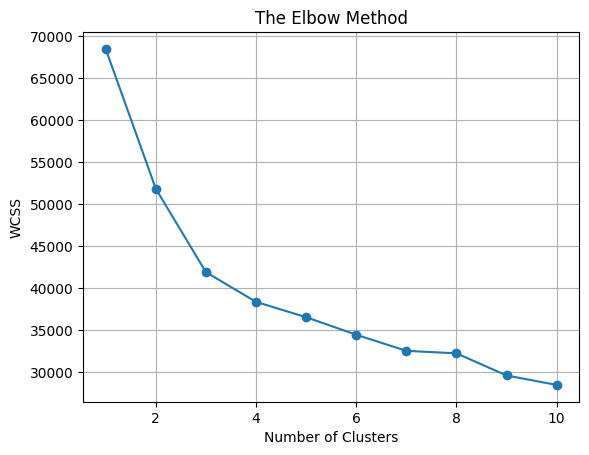

In [39]:
import matplotlib.pyplot as plt

plt.plot(range(1, 11), wcss, marker='o')
plt.title('The Elbow Method')
plt.xlabel('Number of Clusters')
plt.ylabel('WCSS')
plt.grid(True)
plt.show()


In [42]:
n_clusters = 3 

# Fit the KMeans model
kmeans = KMeans(n_clusters = n_clusters, random_state = 42)
kmeans.fit(scaled_data)

#Predict the cluster assignments for each row
cluster_assignments = kmeans.predict(scaled_data)

In [43]:
df.head()

property_type                 society      sector  price_in_crores  \
0          flat  maa bhagwati residency    sector 7             0.45   
1          flat            apna enclave    sector 3             0.50   
2          flat  tulsiani easy in homes  sohna road             0.40   
3          flat     smart world orchard   sector 61             1.47   
4          flat        parkwood westend   sector 92             0.70   

   price_per_sqft  area_sqft                            areaWithType  bedRoom  \
0          5000.0      900.0          Carpet area: 900 (83.61 sq.m.)      2.0   
1          7692.0      650.0          Carpet area: 650 (60.39 sq.m.)      2.0   
2          6722.0      595.0          Carpet area: 595 (55.28 sq.m.)      2.0   
3         12250.0     1200.0        Carpet area: 1200 (111.48 sq.m.)      2.0   
4          5204.0     1345.0  Super Built up area 1345(124.95 sq.m.)      2.0   

   bathroom balcony additionalRoom  floorNum         facing  \
0       2.0       1  not available       4.0           West   
1       2.0       1  not available       1.0           West   
2       2.0       3  not available      12.0  not available   
3       2.0       2     Study Room       2.0  not available   
4       2.0       3     Study Room       5.0  not available   

        agePossession  \
0      Relatively New   
1        Old Property   
2        New Property   
3           Undefined   
4  Under Construction   

                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                nearbyLocations  \
0  ['Chintapurni Mandir', 'State bank ATM', 'Pearl Dental Clinic', 'Taneja Hospital', 'Dr. Ashok Jain', 'Dr. Madan Clinic', 'Geeta Nursing Home Gurgaon', 'Chiranjiv Hospital', 'Dev Man Kathuria Clinic', 'Aryan Hospital', 'Kr Dental Hub', 'Swastik Maternity and Medical Centre', 'Satyam Hospital Gurgaon', 'Ravi Clinic and Health Care Centre', 'D.R. Rajnis Gupta Clinic', 'Esic Hospital Gurugram', 'Gurgaon Eye Centre', 'Bindal Clinic', 'Shiv Mahima Patient Care Bureau', 'Shree Krishna Hospital Gurgaon', 'M.S Hospital', 'My Care Clinic', 'Ankur Clinic and Maternity Home', 'Triveni Hospital Gurgaon', 'Shri Gobind Hospital', 'Navjeevan Hospital and Maternity Centre', 'Lal Superspeciality Hospital', 'Sparsh Hospital Gurgaon', 'Prateek Nursing Home And Polyclinic', 'Jain Sant Phool Chand Ji Charitable Hospital', 'Sarvodya Hospital', 'Bhatnagar Maternity and Nursing Home', 'Tirath Ram Hospitals Pvt Ltd', 'Dr. Sarvejeet Singh', 'Centre For Sight Gurgaon New Railway Road', 'Dr. Ajay S. Gupta Clinic', 'Kidney Clinic', 'Mangalam Hospital and Heart Centre Gurgaon', 'Sethi Hospital Gurgaon', 'Shubham Hospital Gurgaon', 'Kharbanda Maternity and Nursing Home', 'Gupta Hospi

In [44]:
df.columns

Index(['property_type', 'society', 'sector', 'price_in_crores',
       'price_per_sqft', 'area_sqft', 'areaWithType', 'bedRoom', 'bathroom',
       'balcony', 'additionalRoom', 'floorNum', 'facing', 'agePossession',
       'nearbyLocations', 'furnishDetails', 'features', 'Super Built up area',
       'Built Up area', 'Carpet area', 'study room', 'store room',
       'Pooja Room', 'servant room', 'Others', 'Sofa', 'Light', 'Bed', 'Stove',
       'Water Purifier', 'Washing Machine', 'Fan', 'Wardrobe', 'Dining Table',
       'Modular Kitchen', 'Fridge', 'Exhaust Fan', 'AC', 'Curtains',
       'Microwave', 'TV', 'Geyser', 'Chimney'],
      dtype='object')

In [46]:
df.iloc[:,:-18].head()

property_type                 society      sector  price_in_crores  \
0          flat  maa bhagwati residency    sector 7             0.45   
1          flat            apna enclave    sector 3             0.50   
2          flat  tulsiani easy in homes  sohna road             0.40   
3          flat     smart world orchard   sector 61             1.47   
4          flat        parkwood westend   sector 92             0.70   

   price_per_sqft  area_sqft                            areaWithType  bedRoom  \
0          5000.0      900.0          Carpet area: 900 (83.61 sq.m.)      2.0   
1          7692.0      650.0          Carpet area: 650 (60.39 sq.m.)      2.0   
2          6722.0      595.0          Carpet area: 595 (55.28 sq.m.)      2.0   
3         12250.0     1200.0        Carpet area: 1200 (111.48 sq.m.)      2.0   
4          5204.0     1345.0  Super Built up area 1345(124.95 sq.m.)      2.0   

   bathroom balcony additionalRoom  floorNum         facing  \
0       2.0       1  not available       4.0           West   
1       2.0       1  not available       1.0           West   
2       2.0       3  not available      12.0  not available   
3       2.0       2     Study Room       2.0  not available   
4       2.0       3     Study Room       5.0  not available   

        agePossession  \
0      Relatively New   
1        Old Property   
2        New Property   
3           Undefined   
4  Under Construction   

                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                nearbyLocations  \
0  ['Chintapurni Mandir', 'State bank ATM', 'Pearl Dental Clinic', 'Taneja Hospital', 'Dr. Ashok Jain', 'Dr. Madan Clinic', 'Geeta Nursing Home Gurgaon', 'Chiranjiv Hospital', 'Dev Man Kathuria Clinic', 'Aryan Hospital', 'Kr Dental Hub', 'Swastik Maternity and Medical Centre', 'Satyam Hospital Gurgaon', 'Ravi Clinic and Health Care Centre', 'D.R. Rajnis Gupta Clinic', 'Esic Hospital Gurugram', 'Gurgaon Eye Centre', 'Bindal Clinic', 'Shiv Mahima Patient Care Bureau', 'Shree Krishna Hospital Gurgaon', 'M.S Hospital', 'My Care Clinic', 'Ankur Clinic and Maternity Home', 'Triveni Hospital Gurgaon', 'Shri Gobind Hospital', 'Navjeevan Hospital and Maternity Centre', 'Lal Superspeciality Hospital', 'Sparsh Hospital Gurgaon', 'Prateek Nursing Home And Polyclinic', 'Jain Sant Phool Chand Ji Charitable Hospital', 'Sarvodya Hospital', 'Bhatnagar Maternity and Nursing Home', 'Tirath Ram Hospitals Pvt Ltd', 'Dr. Sarvejeet Singh', 'Centre For Sight Gurgaon New Railway Road', 'Dr. Ajay S. Gupta Clinic', 'Kidney Clinic', 'Mangalam Hospital and Heart Centre Gurgaon', 'Sethi Hospital Gurgaon', 'Shubham Hospital Gurgaon', 'Kharbanda Maternity and Nursing Home', 'Gupta Hospi

In [47]:
df = df.iloc[:,:-18]

In [48]:
df['furnishing_type'] = cluster_assignments

In [57]:
df.sample(100)[['furnishDetails', 'furnishing_type']]

# 1 - unfurnished
# 0 - semifurnished
# 2 - furnished

furnishDetails  \
1081      ['1 Bed', '5 Fan', '1 Sofa', '10 Light', '3 AC', '1 Curtains', 'No Chimney', 'No Dining Table', 'No Exhaust Fan', 'No Geyser', 'No Modular Kitchen', 'No Microwave', 'No Fridge', 'No Stove', 'No TV', 'No Wardrobe', 'No Washing Machine', 'No Water Purifier']   
520          ['4 Wardrobe', '1 Water Purifier', '6 Fan', '1 Exhaust Fan', '4 Geyser', '10 Light', '6 AC', '1 Modular Kitchen', '1 Curtains', 'No Bed', 'No Chimney', 'No Dining Table', 'No Microwave', 'No Fridge', 'No Sofa', 'No Stove', 'No TV', 'No Washing Machine']   
2069                                                                                                                                                                                                                                                                   NaN   
3484       ['4 Wardrobe', '10 Fan', '1 Exhaust Fan', '2 Geyser', '9 Light', '1 Modular Kitchen', '1 Curtains', 'No AC', 'No Bed', 'No Chimney', 'No Dining Table', 'No Microwave', 'No Fridge', 'No Sofa', 'No Stove', 'No TV', 'No Washing Machine', 'No Water Purifier']   
2633                                                                                                                                                                                                                                                                   NaN   
2478       ['6 Fan', '1 Exhaust Fan', '3 Geyser', '1 Stove', '11 Light', '1 Modular Kitchen', '1 Chimney', 'No AC', 'No Bed', 'No Curtains', 'No Dining Table', 'No Microwave', 'No Fridge', 'No Sofa', 'No TV', 'No Wardrobe', 'No Washing Machine', 'No Water Purifier']   
1978     ['3 Wardrobe', '4 Geyser', '12 Light', '1 Modular Kitchen', '1 Chimney', 'No AC', 'No Bed', 'No Curtains', 'No Dining Table', 'No Exhaust Fan', 'No Fan', 'No Microwave', 'No Fridge', 'No Sofa', 'No Stove', 'No TV', 'No Washing Machine', 'No Water Purifier']   
1276       ['3 Wardrobe', '6 Fan', '3 Geyser', '10 Light', '3 AC', '1 Chimney', '1 Modular Kitchen', 'No Bed', 'No Curtains', 'No Dining Table', 'No Exhaust Fan', 'No Microwave', 'No Fridge', 'No Sofa', 'No Stove', 'No TV', 'No Washing Machine', 'No Water Purifier']   
3413                                                                                                                                                                                                                                                                   NaN   
2216  ['2 Wardrobe', 'No AC', 'No Bed', 'No Chimney', 'No Curtains', 'No Dining Table', 'No Exhaust Fan', 'No Fan', 'No Geyser', 'No Modular Kitchen', 'No Light', 'No Microwave', 'No Fridge', 'No Sofa', 'No Stove', 'No TV', 'No Washing Machine', 'No Water Purifier']   
1177        ['7 Wardrobe', '5 Fan', '1 Exhaust Fan', '4 Geyser', '16 Light', '4 AC', '1 Modular Kitchen', '1 Chimney', 'No Bed', 'No Curtains', 'No Dining Table', 'No Microwave', 'No Fridge', 'No Sofa', 'No Stove', 'No TV', 'No Washing Machine', 'No Water Purifier']   
624        ['3 Wardrobe', '5 Fan', '1 Exhaust Fan', '1 Geyser', '6 Light', '1 Modular Kitchen', 'No AC', 'No Bed', 'No Chimney', 'No Curtains', 'No Dining Table', 'No Microwave', 'No Fridge', 'No Sofa', 'No Stove', 'No TV', 'No Washing Machine', 'No Water Purifier']   
1005           ['4 Wardrobe', '1 Water Purifier', '5 Fan', '1 Exhaust Fan', '6 Geyser', '1 Stove', '6 Light', '1 Modular Kitchen', '6 AC', '1 Chimney', 'No Bed', 'No Curtains', 'No Dining Table', 'No Microwave', 'No Fridge', 'No Sofa', 'No TV', 'No Washing Machine']   
2573                                                                                                                                                                                                                                                                    []   
1029       ['3 Wardrobe', '1 Exhaust Fan', '3 Geyser', '10 Light', '4 AC', '1 Modular Kitchen', '1 Chimney', 'No Bed', 'No Curtains', 'No Dining Table', 'No Fan', 'No Microwave', 'No Fridge', 'No Sofa',

## features


In [60]:
df[['features']].head()

features
0                                                                                                                                                                               ['Feng Shui / Vaastu Compliant', 'Security / Fire Alarm', 'Lift(s)', 'Water Storage', 'Visitor Parking']
1                                                                                                                                                                                             ['Security / Fire Alarm', 'Maintenance Staff', 'Water Storage', 'Park', 'Visitor Parking']
2                                                                                                                    ['Power Back-up', 'Feng Shui / Vaastu Compliant', 'Intercom Facility', 'Lift(s)', 'Swimming Pool', 'Park', 'Fitness Centre / GYM', 'Club house / Community Center']
3  ['Security / Fire Alarm', 'Private Garden / Terrace', 'Lift(s)', 'Maintenance Staff', 'False Ceiling Lighting', 'Water Storage', 'Visitor Parking', 'Swimming Pool', 'Natural Light', 'Airy Rooms', 'Fitness Centre / GYM', 'Club house / Community Center', 'Water softening plant']
4                                                                                                                                                                                                                                                                                    NaN

In [61]:
df['features'].isnull().sum()

np.int64(635)

In [86]:
df[['society','features']].head()

society  \
0  maa bhagwati residency   
1            apna enclave   
2  tulsiani easy in homes   
3     smart world orchard   
4        parkwood westend   

                                                                                                                                                                                                                                                                                features  
0                                                                                                                                                                               ['Feng Shui / Vaastu Compliant', 'Security / Fire Alarm', 'Lift(s)', 'Water Storage', 'Visitor Parking']  
1                                                                                                                                                                                             ['Security / Fire Alarm', 'Maintenance Staff', 'Water Storage', 'Park', 'Visitor Parking']  
2                                                                                                                    ['Power Back-up', 'Feng Shui / Vaastu Compliant', 'Intercom Facility', 'Lift(s)', 'Swimming Pool', 'Park', 'Fitness Centre / GYM', 'Club house / Community Center']  
3  ['Security / Fire Alarm', 'Private Garden / Terrace', 'Lift(s)', 'Maintenance Staff', 'False Ceiling Lighting', 'Water Storage', 'Visitor Parking', 'Swimming Pool', 'Natural Light', 'Airy Rooms', 'Fitness Centre / GYM', 'Club house / Community Center', 'Water softening plant']  
4                                                                                                                                                                                                                                                                                    NaN

In [67]:
apartment_df = pd.read_excel('real_estate_data.xlsx')
apartment_df.head(2)

PropertyName                               PropertySubName  \
0  Smartworld One DXP  2, 3, 4 BHK Apartment in Sector 113, Gurgaon   
1           M3M Crown     3, 4 BHK Apartment in Sector 111, Gurgaon   

                                                                                                                                  NearbyLocations  \
0                                           ['Bajghera Road', 'Palam Vihar Halt', 'DPSG Palam Vihar', 'Park Hospital', 'Gurgaon Railway Station']   
1  ['DPSG Palam Vihar Gurugram', 'The NorthCap University', 'Park Hospital, Palam Vihar', 'Pacific D21 Mall', 'Palam Vihar Halt Railway Station']   

                                                                                                                                                                                                                                                                                                                                                                                                                                                                                    LocationAdvantages  \
0         {'Bajghera Road': '800 Meter', 'Palam Vihar Halt': '2.5 KM', 'DPSG Palam Vihar': '3.1 KM', 'Park Hospital': '3.1 KM', 'Gurgaon Railway Station': '4.9 KM', 'The NorthCap University': '5.4 KM', 'Dwarka Expy': '1.2 KM', 'Hyatt Place Gurgaon Udyog Vihar': '7.7 KM', 'Dwarka Sector 21, Metro Station': '7.2 KM', 'Pacific D21 Mall': '7.4 KM', 'Indira Gandhi International Airport': '14.7 KM', 'Hamoni Golf Camp': '6.2 KM', 'Fun N Food Waterpark': '8.8 KM', 'Accenture DDC5': '9 KM'}   
1  {'DPSG Palam Vihar Gurugram': '1.4 Km', 'The NorthCap University': '4.4 Km', 'Park Hospital, Palam Vihar': '1.4 Km', 'Pacific D21 Mall': '8.2 Km', 'Palam Vihar Halt Railway Station': '1.2 Km', 'Dwarka Sector 21 Metro Station': '8.1 Km', 'Dwarka Expressway': '450 m', 'Fun N Food Water Park': '8.1 Km', 'Indira Gandhi International Airport': '14.1 Km', 'Tau DeviLal Sports Complex': '11.2 Km', 'Hamoni Golf Camp': '5 Km', 'Hyatt Place': '6.1 Km', 'Altrade Business Centre': '11.2 Km'}   

                                                                          Link  \
0  https://www.99acres.com/smartworld-one-dxp-sector-113-gurgaon-npxid-r400415   
1           https://www.99acres.com/m3m-crown-sector-111-gurgaon-npxid-r404068   

                                                                                                                                                                                                                                                                                                                                                                                           PriceDetails  \
0  {'2 BHK': {'building_type': 'Apartment', 'area_type': 'Carpet Area', 'area': '1,370 sq.ft.', 'price-range': '₹ 2 - 2.4 Cr'}, '3 BHK': {'building_type': 'Apartment', 'area_type': 'Carpet Area', 'area': '1,850 - 2,050 sq.ft.', 'price-range': '₹ 2.25 - 3.59 Cr'}, '4 BHK': {'building_type': 'Apartment', 'area_type': 'Carpet Area', 'area': '2,600 sq.ft.', 'price-range': '₹ 3.24 - 4.56 Cr'}}   
1                                                                                                       {'3 BHK': {'building_type': 'Apartment', 'area_type': 'Super Built-up Area', 'area': '1,605 - 2,170 sq.ft.', 'price-range': '₹ 2.2 - 3.03 Cr'}, '4 BHK': {'building_type': 'Apartment', 'area_type': 'Super Built-up Area', 'area': '2,248 - 2,670 sq.ft.', 'price-range': '₹ 3.08 - 3.73 Cr'}}   

                                                                                                                                   TopFacilities  
0                     ['Swimming Pool', 'Salon', 'Restaurant', 'Spa', 'Cafeteria', 'Sun Deck', '24x7 Security', 'Club House', 'Gated Community']  
1  ['Bowling Alley', 'Mini Theatre', 'Manicured Garden', 'Swimming Pool', 'Flower Garden', 'Reading Lounge', 'Golf Course', 'Barbecue', 'Sauna']

In [68]:
df['features'].isnull().sum()

np.int64(635)

In [69]:
apartment_df['PropertyName'] = apartment_df['PropertyName'].str.lower()

In [71]:
temp_df = df[df['features'].isnull()]

In [72]:
temp_df

property_type                                  society  \
4             flat                         parkwood westend   
5             flat           signature global infinity mall   
6             flat                               the cocoon   
12            flat                       supertech araville   
13            flat                                   godrej   
15            flat                               sobha city   
16            flat                             senate court   
22            flat                         smart world gems   
25            flat                              the serenas   
26            flat                           m3m golfestate   
29            flat                           godrej habitat   
30            flat                      ompee k s residency   
33            flat                          sare green parc   
34            flat                     shree vardhman flora   
43            flat                          pooja apartment   
57            flat                               chd avenue   
64            flat                   bptp freedom park life   
65            flat                           godrej habitat   
67            flat                        sidhartha ncr one   
75            flat                   bestech park view city   
78            flat                            m3m soulitude   
86            flat                    signature global city   
87            flat                              m3m heights   
89            flat                    signature global park   
90            flat                       godrej nature plus   
91            flat                           supertech hues   
92            flat                     dlf new town heights   
103           flat                              godrej aria   
105           flat                            conscient one   
113           flat                          ramprastha city   
116           flat                    czar mahira homes 63a   
118           flat                      trisara our homes 3   
119           flat                            m3m soulitude   
121           flat                          ramprastha city   
122           flat                 pareena coban residences   
123           flat                  la vida by tata housing   
125           flat              godrej summit premia towers   
127           flat                    m3m one key resiments   
131           flat             sushant lok 1 builder floors   
134           flat                  signature global solera   
146           flat                              m3m heights   
147           flat                       supertech hilltown   
148           flat                          raheja vedaanta   
149           flat                               bptp terra   
151           flat                   m3m golf hills phase 1   
159           flat                           aardhya homesh   
160           flat                               rof ananda   
164           flat                       vatika inxt floors   
172           flat                       experion heartsong   
173           flat                              ss the leaf   
179           flat                   project krishna colony   
181           flat                        m3m antalya hills   
182           flat               central park flower valley   
186           flat                      aipl zen residences   
187           flat                              m3m heights   
188           flat                        hcbs sports ville   
189           flat                        hcbs sports ville   
190           flat                     housing apna enclave   
191           flat                           assotech blith   
192           flat                          pareena mi casa   
195           flat           ramson kshitij sec-95 gurugram   
199           flat           signature global the millennia   
205           flat                  

In [73]:
temp_df.shape

(635, 26)

In [84]:
temp = temp_df.merge(apartment_df, left_on='society', right_on='PropertyName', how='left')['TopFacilities']

In [77]:
temp_df.index

Index([   4,    5,    6,   12,   13,   15,   16,   22,   25,   26,
       ...
       3413, 3418, 3424, 3427, 3483, 3549, 3591, 3605, 3654, 3668],
      dtype='int64', length=635)

In [87]:
df.loc[temp_df.index, 'features'].head()

4     NaN
5     NaN
6     NaN
12    NaN
13    NaN
Name: features, dtype: object

In [88]:
df.loc[temp_df.index, 'features'] = temp.values

In [89]:
df['features'].isnull().sum()

np.int64(496)

In [90]:
from sklearn.preprocessing import MultiLabelBinarizer
import ast

In [93]:
# convert the string representation of lists in the 'features' column to actual lists
df['features_list'] = df['features'].apply(
    lambda x: ast.literal_eval(x) if pd.notnull(x) and x.startswith('[') else []
)

# Use MultiLabelBinarizer to convert the features list into a binary matrix
mlb = MultiLabelBinarizer()
features_binary_matrix = mlb.fit_transform(df['features_list'])

# Convert the binary matrix into DataFrame
features_binary_df = pd.DataFrame(features_binary_matrix, columns=mlb.classes_)

In [94]:
features_binary_df.shape

(3803, 128)

In [97]:
from sklearn.cluster import KMeans

wcss_reduced = []

for i in range(1, 11):
    kmeans = KMeans(n_clusters=i, init='k-means++', random_state=42)
    kmeans.fit(features_binary_df)
    wcss_reduced.append(kmeans.inertia_)


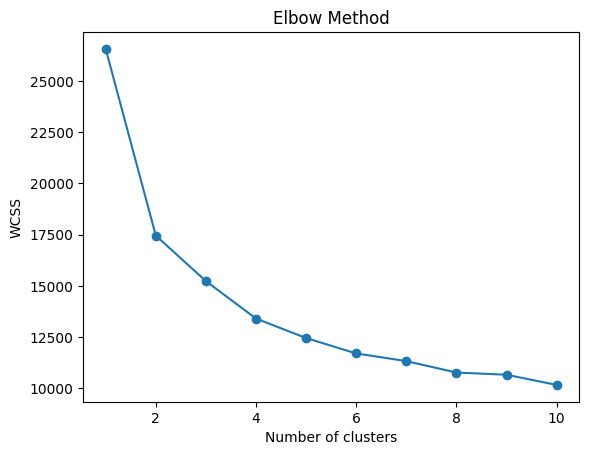

In [98]:
import matplotlib.pyplot as plt

plt.plot(range(1, 11), wcss_reduced, marker='o')
plt.title('Elbow Method')
plt.xlabel('Number of clusters')
plt.ylabel('WCSS')
plt.show()


In [100]:
# Define the weights for each feature as provided 
# Assigning weights based on perceived luxury contribution

weights = {
          '24/7 Power Backup' : 8,
          '24/7 Water Supply' : 4,
          '24x7 Security' : 7,
          'ATM' : 4,
          'Aerobics Centre' : 6,
          'Airy Rooms' : 8,
          'Amphitheatre' : 7,
          'Badminton Court' : 7,
          'Banquet Hall' : 8,
          'Bar/Chill-Out Lounge' : 9,
          'Barbecue' : 7,
          'Basketball Court' : 7,
          'Billiards' : 7,
          'Bowling Alley' : 8,
          'Business Lounge' : 9,
          'CCTV Camera Security' : 8,
          'Cafeteria' : 6,
          'Car Parking' : 6,
          'Card Room' : 6,
          'Centrally Air Conditioned' : 9,
          'Changing Area' : 6,
          "Children's Play Area" : 7,
          'Cigar Lounge' : 9,
          'Clinic' : 5,
          'Club House' : 9,
          'Concierge Service' : 9,
          'Conference room' : 8,
          'Creche/Day care' : 7,
          'Cricket Pitch' : 7,
          'Doctor on Call' : 6,
          'Earthquake Resistant' : 5,
          'Entrance Lobby' : 7,
          'False Ceiling Lighting' : 6,
          'Feng Shui / Vaastu Compliant' : 5,
          #'Fire Fighting Systems' : 8,
          'Fitness Centre / GYM' : 8,
          'Flower Garden' : 7,
          'Food Court' : 6,
          'Foosball' : 5,
          'Football' : 7,
          'Fountain' : 7,
          'Gated Community' : 7,
          'Golf Course' : 10,
          'Grocery Shop' : 6,
          'Gymnasium' : 8,
          'High Ceiling Height' : 8,
          'High Speed Elevators' : 8,
          'Infinity Pool' : 9,
          'Intercom Facility' : 7,
          #'Internal Street Lights' : 6,
          'Internet/wi-fi connectivity' : 7,
          'Jacuzzi' : 9,
          'Jogging Track' : 7,
          'Landscape Garden' : 8,
          'Laundry' : 6,
          'Lawn Tennis Court' : 8,
          'Library' : 8,
          'Lounge' : 8,
          'Low Density Society' : 7,
          'Maintenance Staff' : 6,
          'Manicured Garden' : 7,
          'Medical Centre' : 5,
          'Milk Booth' : 4,
          'Mini Theatre' : 9,
          'Multipurpose Court' : 7,
          'Multipurpose Hall' : 7,
          'Natural Light' : 8,
          'Natural Pond' : 7,
          'Park' : 8,
          'Party Lawn' : 8,
          'Piped Gas' : 7,
          'Pool Table' : 7,
          'Power Back up Lift' : 8,
          'Private Garden / Terrace' : 9,
          'Property Staff' : 7,
          'RO System' : 7,
          'Rain Water Harvesting' : 7,
          'Reading Lounge' : 8,
          'Restaurant' : 8,
          'Salon' : 8,
          'Sauna' : 9,
          'Security / Fire Alarm' : 9,
          'Security Personnel' : 9,
          'Separate entry for servant room' : 8,
          'Sewage Treatment Plant' : 6,
          'Shopping Centre' : 7,
          'Skating Rink' : 7,
          'Solar Lighting' : 6,
          'Solar Water Heating' : 7,
          'Spa' : 9,
          'Spacious Interiors' : 9,
          'Squash Court' : 8,
          'Steam Room' : 9,
          'Sun Deck' : 8,
          'Swimming Pool' : 8,
          'Temple' : 5,
          'Theatre' : 9,
          'Toddler Pool' : 7,
          'Valet Parking' : 9,
          'Video Door Security' : 9,
          'Visitor Parking' : 7,
          'Water Softener Plant' : 7,
          'Water Storage' : 7,
          'Water purifier' : 7,
          'Yoga/Meditation Area' : 7
    }
# Calculate luxury score for each row
luxury_score = features_binary_df[list(weights.keys())].multiply(list(weights.values())).sum(axis=1)

In [108]:
features_binary_df[list(weights.keys())].multiply(list(weights.values())).sum(axis=1)

0        28
1        37
2        36
3        76
4         0
5         0
6         0
7        60
8        58
9       100
10       49
11       44
12        0
13        0
14       15
15       59
16        0
17       49
18      104
19       49
20       38
21       49
22       45
23       95
24       72
25        0
26       34
27       49
28       42
29       60
30        0
31      119
32       14
33        0
34       60
35       72
36       83
37      109
38      103
39       15
40       67
41       49
42      130
43        0
44       46
45      102
46       97
47      110
48       72
49       38
50       52
51       49
52       16
53       46
54       44
55       22
56       37
57        0
58       80
59       37
60       97
61      109
62       62
63       51
64       55
65       60
66       50
67        0
68       49
69       37
70       43
71       90
72       44
73       42
74      111
75        0
76       95
77       75
78       61
79       15
80      105
81       38
82       58
83  

In [109]:
df['luxury_score'] = luxury_score

In [110]:
df.head(2)

property_type                 society    sector  price_in_crores  \
0          flat  maa bhagwati residency  sector 7             0.45   
1          flat            apna enclave  sector 3             0.50   

   price_per_sqft  area_sqft                    areaWithType  bedRoom  \
0          5000.0      900.0  Carpet area: 900 (83.61 sq.m.)      2.0   
1          7692.0      650.0  Carpet area: 650 (60.39 sq.m.)      2.0   

   bathroom balcony additionalRoom  floorNum facing   agePossession  \
0       2.0       1  not available       4.0   West  Relatively New   
1       2.0       1  not available       1.0   West    Old Property   

                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                nearbyLocations  \
0  ['Chintapurni Mandir', 'State bank ATM', 'Pearl Dental Clinic', 'Taneja Hospital', 'Dr. Ashok Jain', 'Dr. Madan Clinic', 'Geeta Nursing Home Gurgaon', 'Chiranjiv Hospital', 'Dev Man Kathuria Clinic', 'Aryan Hospital', 'Kr Dental Hub', 'Swastik Maternity and Medical Centre', 'Satyam Hospital Gurgaon', 'Ravi Clinic and Health Care Centre', 'D.R. Rajnis Gupta Clinic', 'Esic Hospital Gurugram', 'Gurgaon Eye Centre', 'Bindal Clinic', 'Shiv Mahima Patient Care Bureau', 'Shree Krishna Hospital Gurgaon', 'M.S Hospital', 'My Care Clinic', 'Ankur Clinic and Maternity Home', 'Triveni Hospital Gurgaon', 'Shri Gobind Hospital', 'Navjeevan Hospital and Maternity Centre', 'Lal Superspeciality Hospital', 'Sparsh Hospital Gurgaon', 'Prateek Nursing Home And Polyclinic', 'Jain Sant Phool Chand Ji Charitable Hospital', 'Sarvodya Hospital', 'Bhatnagar Maternity and Nursing Home', 'Tirath Ram Hospitals Pvt Ltd', 'Dr. Sarvejeet Singh', 'Centre For Sight Gurgaon New Railway Road', 'Dr. Ajay S. Gupta Clinic', 'Kidney Clinic', 'Mangalam Hospital and Heart Centre Gurgaon', 'Sethi Hospital Gurgaon', 'Shubham Hospital Gurgaon', 'Kharbanda Maternity and Nursing Home', 'Gupta Hospital Gurgaon', 'Dentecare - Multispeciality Dental Clinic', 'State bank of india', 'Hdfc bank', 'Kotak bank', 'Indian bank', 'Pizza Hut', 'St. Michaels Sr. Sec. School', 'Dronacharya Government College']   
1                                                                                                                                                ['Chintapurni Mandir', 'Sheetla Mata Mandir', 'State bank ATM', 'Sneh Hospital Gurgaon', 'Jiya Clinic', 'Dr. Mittal Clinic', "Dr. Anurag's Child Care Clinic", 'Yashroop Medical Centre', 'Dr. Sindhu Clinic', 'Bhardwaj Hospital', 'Jain Sant Phool Chand Ji Charitable Hospital', 'Sarvodya Hospital', 'Dr. Hitesh Dawar', 'Prateek Nursing Home And Polyclinic', 'R K Hospital Gurgaon', 'Chirag Hospital Pvt. Ltd', 'Kr Dental Hub', 'Gurgaon Eye Centre', 'Shree 

In [111]:
df.drop(columns=['nearbyLocations','furnishDetails','features','features_list','additionalRoom'], inplace=True)

In [112]:
df.head()

property_type                 society      sector  price_in_crores  \
0          flat  maa bhagwati residency    sector 7             0.45   
1          flat            apna enclave    sector 3             0.50   
2          flat  tulsiani easy in homes  sohna road             0.40   
3          flat     smart world orchard   sector 61             1.47   
4          flat        parkwood westend   sector 92             0.70   

   price_per_sqft  area_sqft                            areaWithType  bedRoom  \
0          5000.0      900.0          Carpet area: 900 (83.61 sq.m.)      2.0   
1          7692.0      650.0          Carpet area: 650 (60.39 sq.m.)      2.0   
2          6722.0      595.0          Carpet area: 595 (55.28 sq.m.)      2.0   
3         12250.0     1200.0        Carpet area: 1200 (111.48 sq.m.)      2.0   
4          5204.0     1345.0  Super Built up area 1345(124.95 sq.m.)      2.0   

   bathroom balcony  floorNum         facing       agePossession  \
0       2.0       1       4.0           West      Relatively New   
1       2.0       1       1.0           West        Old Property   
2       2.0       3      12.0  not available        New Property   
3       2.0       2       2.0  not available           Undefined   
4       2.0       3       5.0  not available  Under Construction   

  Super Built up area Built Up area Carpet area  study room  store room  \
0                None          None         900           0           0   
1                None          None         650           0           0   
2                None          None         595           0           0   
3                None          None        1200           0           0   
4                1345          None        None           0           0   

   Pooja Room  servant room  Others  furnishing_type  luxury_score  
0           0             0       0                1            28  
1           0             0       0                0            37  
2           0             0       0                1            36  
3           0             0       0                1            76  
4           0             0       0                1             0

In [113]:
df.shape

(3803, 23)

In [114]:
df.to_csv('gurgaon_property_aftercleaning.csv')